# Hypothesis Testing in Healthcare: Drug Safety

A pharmaceutical company GlobalXYZ has just completed a randomized controlled drug trial. To promote transparency and reproducibility of the drug's outcome, they (GlobalXYZ) have presented the dataset to your organization, a non-profit that focuses primarily on drug safety.

The dataset provided contained five adverse effects, demographic data, vital signs, etc. Your organization is primarily interested in the drug's adverse reactions. It wants to know if the adverse reactions, if any, are of significant proportions. It has asked you to explore and answer some questions from the data.

The dataset `drug_safety.csv` was obtained from [Hbiostat](https://hbiostat.org/data/) courtesy of the Vanderbilt University Department of Biostatistics. It contained five adverse effects: headache, abdominal pain, dyspepsia, upper respiratory infection, chronic obstructive airway disease (COAD), demographic data, vital signs, lab measures, etc. The ratio of drug observations to placebo observations is 2 to 1.

For this project, the dataset has been modified to reflect the presence and absence of adverse effects `adverse_effects` and the number of adverse effects in a single individual `num_effects`.

The columns in the modified dataset are: 

| Column | Description |
|--------|-------------|
|`sex` | The gender of the individual |
|`age` | The age of the individual |
|`week` | The week of the drug testing |
|`trx` | The treatment (Drug) and control (Placebo) groups | 
|`wbc` | The count of white blood cells |
|`rbc` | The count of red blood cells |
|`adverse_effects` | The presence of at least a single adverse effect |
|`num_effects` | The number of adverse effects experienced by a single individual |

The original dataset can be found [here](https://hbiostat.org/data/repo/safety.rda).

Your organization has asked you to explore and answer some questions from the data collected. See the project instructions.

# Deliberation

## Configuration

In [52]:
# Import packages
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
drug_safety = pd.read_csv("drug_safety.csv")


## Two-sample proportion test

This test will be made to verify if the proportion of successes is significantly different between the treatment and control groups

Proportion 1: proportion of cases where there was no adverse effect

Proportion 2: proportion of cases where there was at least one adverse effect

We will test the difference between these proportions in two groups: the treatment (drug) and the control (placebo) groups

H0: the proportion of cases where there was an adverse effect is the same in the treatment and the control groups

H1: the proportion of cases where there was an adverse effect is different between the treatment and the control groups

This is a two-tailed test

In [53]:
# Obtain the count of successes and total counts

p_hats = drug_safety.groupby(by = "trx")["adverse_effects"].value_counts()

n = drug_safety.groupby(by = "trx")["adverse_effects"].count()

print(p_hats, n)

# Obtain the successes in each group and total counts

successes_array = np.array([p_hats["Drug"]["Yes"], p_hats["Placebo"]["Yes"]])

counts_array = np.array([n[0], n[1]])

# Obtain the z-score and p-value

z_score, p_value = proportions_ztest(count = successes_array, nobs = counts_array, alternative = "two-sided")

two_sample_p_value = p_value

# Two-sample proportion test conclusion: given that the obtained p_value is greater than the set significance level, we can conclude that there is no difference in proportions between the two groups


trx      adverse_effects
Drug     No                 9703
         Yes                1024
Placebo  No                 4864
         Yes                 512
Name: adverse_effects, dtype: int64 trx
Drug       10727
Placebo     5376
Name: adverse_effects, dtype: int64


## Chi-square test of independence

This test will see if the number of side effects a patient has and that patients group (treatment or control) are independent. This will be done in order to verify if the group the patient is in influences the number of side effects




<AxesSubplot: xlabel='trx'>

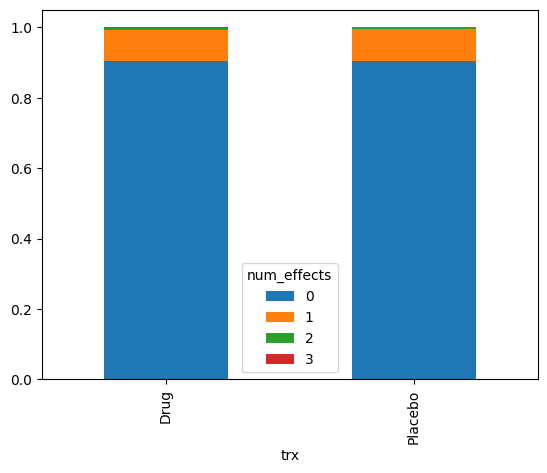

In [54]:
# Visualize the data

props = drug_safety.groupby("trx")["num_effects"].value_counts(normalize = True)

props_wide = props.unstack()

props_wide.plot(kind = "bar", stacked = True)

In [55]:
# Obtain the arrays

expected, observed, stats = pingouin.chi2_independence(data = drug_safety, x = "trx", y = "num_effects")

print(stats)

num_effects_p_value = 0.615012

# Visualizing the data, we notice that the proportion of number of effects in the drug and placebo groups are similar. This is an indication that the two variables (trx and num_effects) are independent. Given that the Pearson p-value is greater than the significance level, we conclude that the two variables are in fact independent

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  1.799644  3.0  0.615012  0.010572  0.176275
1        cressie-read  0.666667  1.836006  3.0  0.607131  0.010678  0.179153
2      log-likelihood  0.000000  1.922495  3.0  0.588648  0.010926  0.186033
3       freeman-tukey -0.500000  2.001752  3.0  0.572043  0.011149  0.192379
4  mod-log-likelihood -1.000000  2.096158  3.0  0.552690  0.011409  0.199984
5              neyman -2.000000  2.344303  3.0  0.504087  0.012066  0.220189


## Checking the age distribution

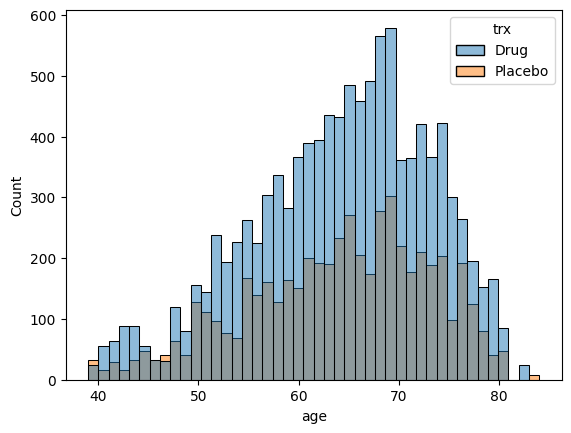

In [56]:
# Create a histogram for each "trx" group to see if the "age" variable is normally distributed within each of these groups

sns.histplot(data = drug_safety, x = "age", hue = "trx")

plt.show()

## Significant difference between the ages of both groups

In [57]:
# Select the age of the Drug group
age_trx = drug_safety.loc[drug_safety["trx"] == "Drug", "age"]

# Select the age of the Placebo group
age_placebo = drug_safety.loc[drug_safety["trx"] == "Placebo", "age"]

# Since the data distribution is not normal
# Conduct a two-sided Mann-Whitney U test
age_group_effects = pingouin.mwu(age_trx, age_placebo)

# Extract the p-value
age_group_effects_p_value = age_group_effects["p-val"]

print(age_group_effects_p_value)

MWU    0.256963
Name: p-val, dtype: float64
